In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.metrics import accuracy_score, f1_score

In [2]:
frames = list()
results = pd.read_csv("input/train.csv")

counts = []

for i in range(1,19):
    exp = '0' + str(i) if i < 10 else str(i)
    frame = pd.read_csv("input/experiment_{}.csv".format(exp))
    counts.append(len(frame))
    row = results[results['No'] == i]
    # frame['target'] = 1 if row.iloc[0]['tool_condition'] == 'worn' else 0
    frames.append(frame)

df = pd.concat(frames, ignore_index = True)
df.head()

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,...,S1_CurrentFeedback,S1_DCBusVoltage,S1_OutputCurrent,S1_OutputVoltage,S1_OutputPower,S1_SystemInertia,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process
0,198.0,0.0,0.00,198.0,0.0,0.000000,0.18,0.0207,329.0,2.77,...,0.524,2.740000e-19,329.0,0.0,6.960000e-07,12.0,1.0,0.0,50.0,Starting
1,198.0,-10.8,-350.00,198.0,-13.6,-358.000000,-10.90,0.1860,328.0,23.30,...,-0.288,2.740000e-19,328.0,0.0,-5.270000e-07,12.0,1.0,4.0,50.0,Prep
2,196.0,-17.8,-6.25,196.0,-17.9,-0.000095,-8.59,0.1400,328.0,30.60,...,0.524,2.740000e-19,328.0,0.0,9.100000e-07,12.0,1.0,7.0,50.0,Prep
3,194.0,-18.0,0.00,194.0,-17.9,-0.000095,-6.11,0.1300,327.0,30.30,...,-0.180,2.740000e-19,328.0,0.0,1.070000e-06,12.0,1.0,7.0,50.0,Prep
4,193.0,-17.9,-18.80,192.0,-17.9,0.000095,-5.70,0.1140,328.0,30.50,...,0.226,2.740000e-19,328.0,0.0,1.960000e-06,12.0,1.0,7.0,50.0,Prep


In [28]:
train = pd.read_csv("input/train.csv")
train

,No,material,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection
0,1,wax,6,4.0,unworn,yes,yes
1,2,wax,20,4.0,unworn,yes,yes
2,3,wax,6,3.0,unworn,yes,yes
3,4,wax,6,2.5,unworn,no,NaN
4,5,wax,20,3.0,unworn,no,NaN
5,6,wax,6,4.0,worn,yes,no
6,7,wax,20,4.0,worn,no,NaN
7,8,wax,20,4.0,worn,yes,no
8,9,wax,15,4.0,worn,yes,no
9,10,wax,12,4.0,worn,yes,no


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [5]:
for col in ["feedrate","clamp_pressure","tool_condition", "machining_finalized", "passed_visual_inspection"]:
    column = []
    for i in range(18):
        column.extend([train[col][i]]*(counts[i]))
    df[col] = column

In [6]:
df["tool_condition"] = np.where(df["tool_condition"]=="worn", 1, 0)
df["machining_finalized"] = np.where(df["machining_finalized"]=="yes", 1, 0)
df["passed_visual_inspection"] = np.where(df["passed_visual_inspection"]=="yes", 1, 0)
df["tool_condition"] = le.fit_transform(df["tool_condition"])
df["machining_finalized"] = le.fit_transform(df["machining_finalized"])
df["passed_visual_inspection"] = le.fit_transform(df["passed_visual_inspection"])
df["Machining_Process"] = le.fit_transform(df["Machining_Process"])
df.drop(["passed_visual_inspection", "machining_finalized"],axis=1, inplace=True)
df

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,...,S1_OutputVoltage,S1_OutputPower,S1_SystemInertia,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process,feedrate,clamp_pressure,tool_condition
0,198.0,0.00,0.00,198.0,0.00,0.000000,0.18,0.0207,329.0,2.77,...,0.0,6.960000e-07,12.0,1.0,0.0,50.0,9,6,4.0,0
1,198.0,-10.80,-350.00,198.0,-13.60,-358.000000,-10.90,0.1860,328.0,23.30,...,0.0,-5.270000e-07,12.0,1.0,4.0,50.0,7,6,4.0,0
2,196.0,-17.80,-6.25,196.0,-17.90,-0.000095,-8.59,0.1400,328.0,30.60,...,0.0,9.100000e-07,12.0,1.0,7.0,50.0,7,6,4.0,0
3,194.0,-18.00,0.00,194.0,-17.90,-0.000095,-6.11,0.1300,327.0,30.30,...,0.0,1.070000e-06,12.0,1.0,7.0,50.0,7,6,4.0,0
4,193.0,-17.90,-18.80,192.0,-17.90,0.000095,-5.70,0.1140,328.0,30.50,...,0.0,1.960000e-06,12.0,1.0,7.0,50.0,7,6,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25281,144.0,-2.30,100.00,144.0,-2.57,0.977000,-5.05,0.0732,327.0,9.56,...,118.0,1.580000e-01,12.0,1.0,57.0,3.0,0,3,2.5,1
25282,144.0,-2.47,25.00,144.0,-2.46,1.080000,-5.62,0.0996,327.0,10.30,...,119.0,1.870000e-01,12.0,1.0,57.0,3.0,0,3,2.5,1
25283,143.0,-2.20,81.20,143.0,-2.35,1.170000,-4.42,0.0539,327.0,7.79,...,119.0,1.820000e-01,12.0,1.0,57.0,3.0,0,3,2.5,1
25284,143.0,-2.05,68.70,143.0,-2.23,1.260000,-5.83,0.0809,327.0,8.32,...,118.0,1.820000e-01,12.0,1.0,57.0,3.0,0,3,2.5,1


In [29]:
df.columns

Index(['X1_ActualPosition', 'X1_ActualVelocity', 'X1_ActualAcceleration',
       'X1_CommandPosition', 'X1_CommandVelocity', 'X1_CommandAcceleration',
       'X1_CurrentFeedback', 'X1_DCBusVoltage', 'X1_OutputCurrent',
       'X1_OutputVoltage', 'X1_OutputPower', 'Y1_ActualPosition',
       'Y1_ActualVelocity', 'Y1_ActualAcceleration', 'Y1_CommandPosition',
       'Y1_CommandVelocity', 'Y1_CommandAcceleration', 'Y1_CurrentFeedback',
       'Y1_DCBusVoltage', 'Y1_OutputCurrent', 'Y1_OutputVoltage',
       'Y1_OutputPower', 'Z1_ActualPosition', 'Z1_ActualVelocity',
       'Z1_ActualAcceleration', 'Z1_CommandPosition', 'Z1_CommandVelocity',
       'Z1_CommandAcceleration', 'Z1_CurrentFeedback', 'Z1_DCBusVoltage',
       'Z1_OutputCurrent', 'Z1_OutputVoltage', 'S1_ActualPosition',
       'S1_ActualVelocity', 'S1_ActualAcceleration', 'S1_CommandPosition',
       'S1_CommandVelocity', 'S1_CommandAcceleration', 'S1_CurrentFeedback',
       'S1_DCBusVoltage', 'S1_OutputCurrent', 'S1_OutputVolt

Y1_OutputCurrent             0.176805
X1_CommandPosition           0.092029
X1_ActualPosition            0.091920
clamp_pressure               0.091851
Y1_CommandPosition           0.090920
Y1_ActualPosition            0.090862
X1_OutputCurrent             0.080973
X1_DCBusVoltage              0.076864
X1_OutputVoltage             0.075167
Z1_CommandPosition           0.064638
Z1_ActualPosition            0.064627
M1_CURRENT_FEEDRATE          0.061106
X1_OutputPower               0.058509
Y1_OutputVoltage             0.056277
S1_OutputCurrent             0.054738
Y1_DCBusVoltage              0.050999
feedrate                     0.049609
Y1_OutputPower               0.045418
S1_CurrentFeedback           0.022222
S1_ActualVelocity            0.021777
X1_CurrentFeedback           0.020931
S1_CommandVelocity           0.019994
S1_OutputVoltage             0.019141
S1_DCBusVoltage              0.018190
S1_OutputPower               0.017337
M1_sequence_number           0.015939
Y1_ActualVel

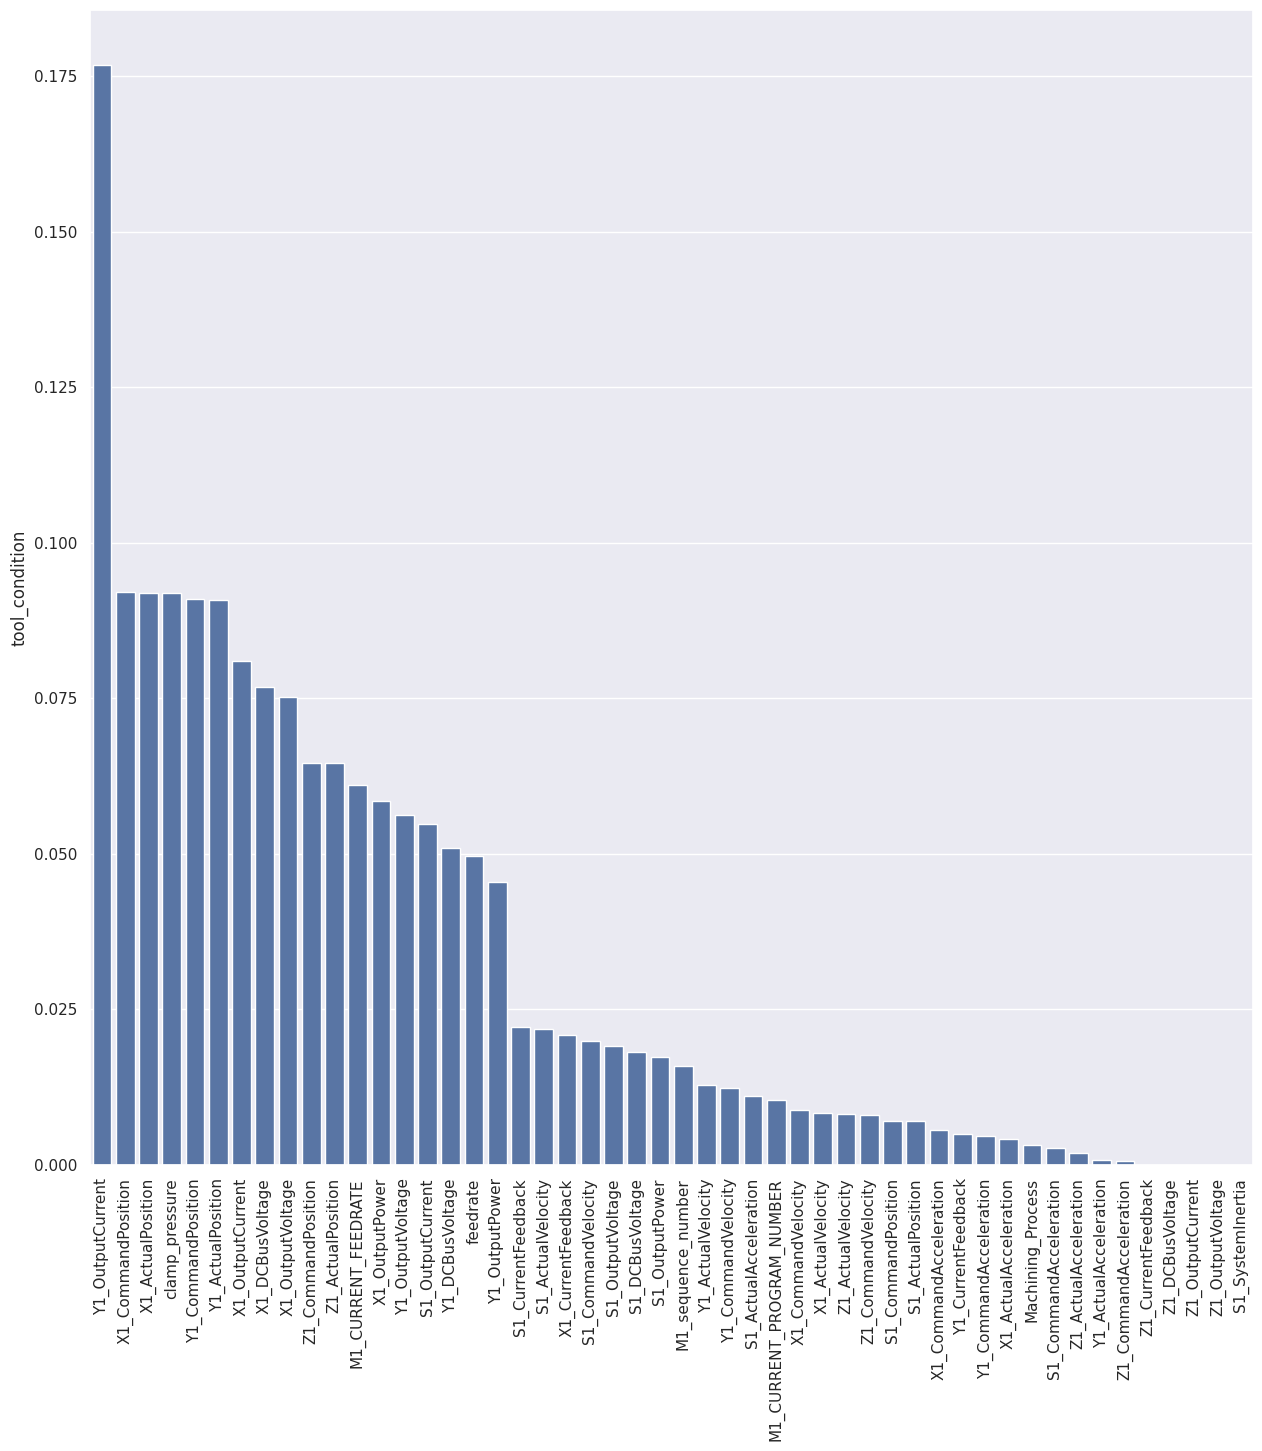

In [7]:
sns.set()
fig, ax = plt.subplots(figsize=(15,15))
a = df.corr()
a = abs(a)
a.sort_values(by = ["tool_condition"], ascending=False, inplace=True)
x = a["tool_condition"][1:]
y = a.index[1:]
# print(len(x), len(y))
print(x)
sns.set()
sns.barplot(x, ax=ax)
ax.tick_params(axis = "x", rotation = 90)

In [8]:
# print(a)
corr_cols = a.index[:16]
print(corr_cols)
corr_data = df.loc[:,corr_cols]
corr_data.reset_index(inplace=True, drop=True)
print(corr_data.head())

Index(['tool_condition', 'Y1_OutputCurrent', 'X1_CommandPosition',
       'X1_ActualPosition', 'clamp_pressure', 'Y1_CommandPosition',
       'Y1_ActualPosition', 'X1_OutputCurrent', 'X1_DCBusVoltage',
       'X1_OutputVoltage', 'Z1_CommandPosition', 'Z1_ActualPosition',
       'M1_CURRENT_FEEDRATE', 'X1_OutputPower', 'Y1_OutputVoltage',
       'S1_OutputCurrent'],
      dtype='object')
   tool_condition  Y1_OutputCurrent  X1_CommandPosition  X1_ActualPosition  \
0               0             328.0               198.0              198.0   
1               0             325.0               198.0              198.0   
2               0             327.0               196.0              196.0   
3               0             325.0               194.0              194.0   
4               0             326.0               192.0              193.0   

   clamp_pressure  Y1_CommandPosition  Y1_ActualPosition  X1_OutputCurrent  \
0             4.0               158.0              158.0       

Text(0, 0.5, 'tool_condition')

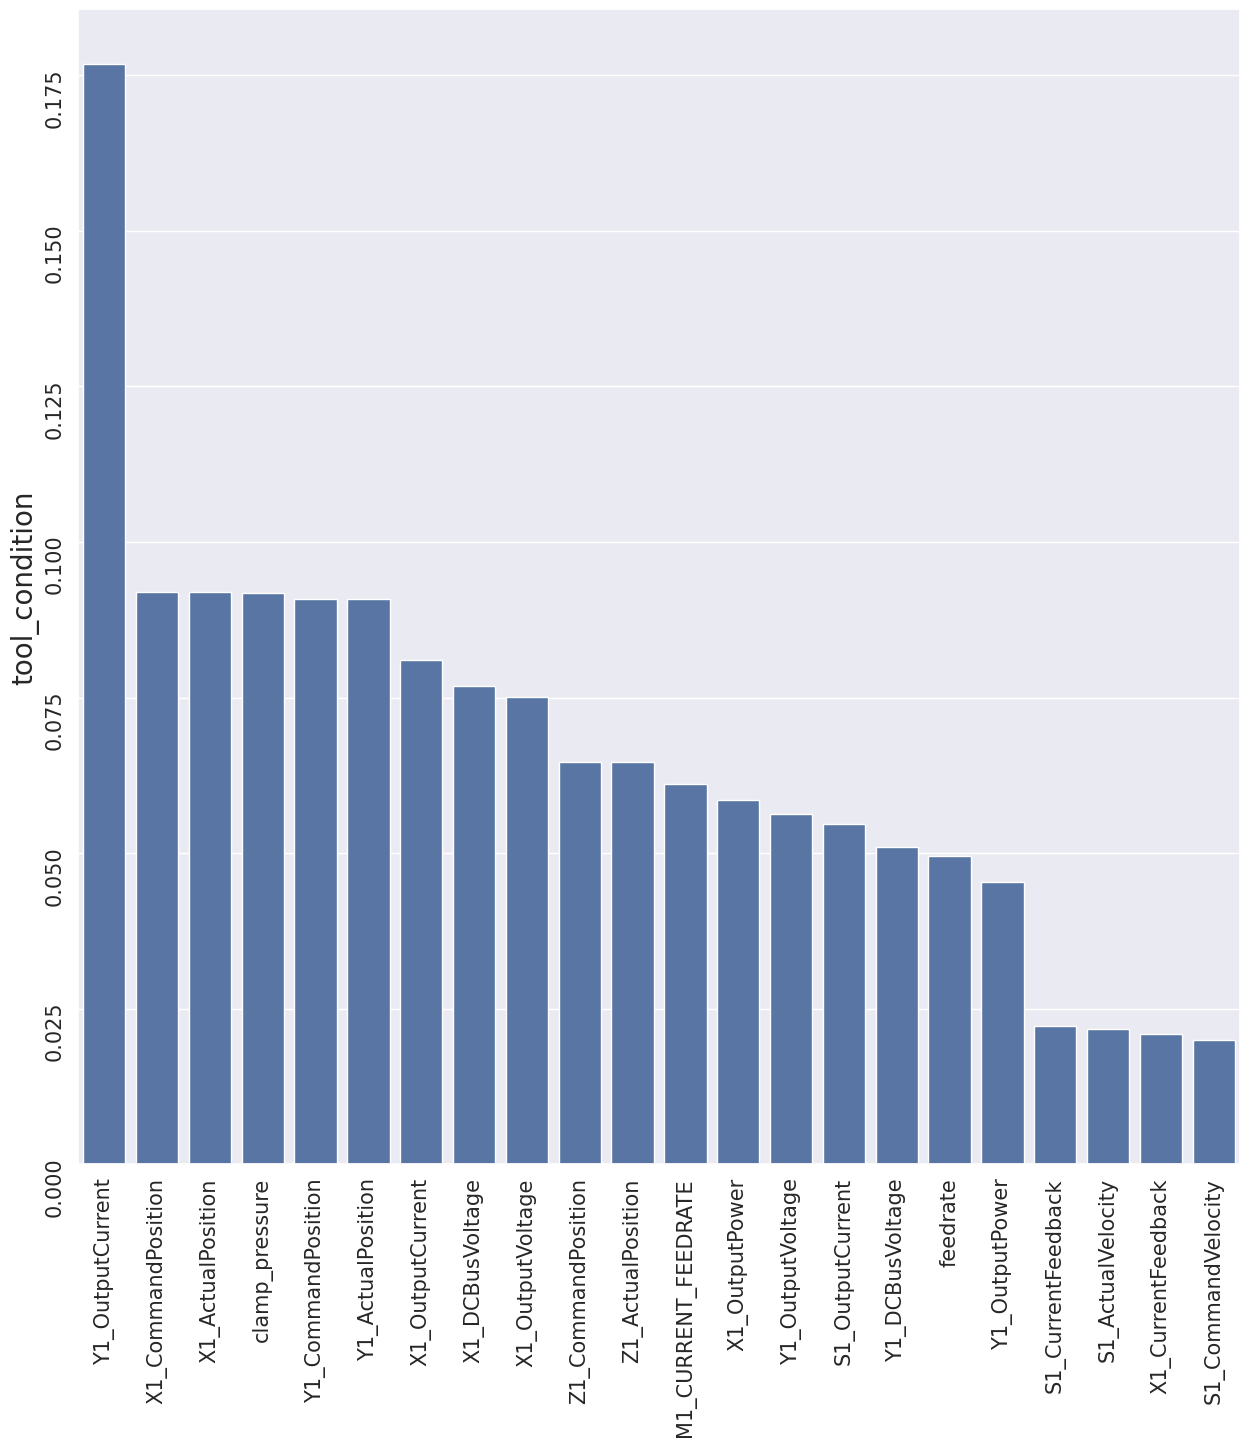

In [9]:
fig, ax = plt.subplots(figsize=(15,15))
a = df.corr()
a = abs(a)
a.sort_values(by = ["tool_condition"], ascending=False, inplace=True)
x = a["tool_condition"][1:23]
y = a.index[1:23]
#print(len(x), len(y))
sns.set()
sns.barplot(x, ax=ax)
ax.tick_params(axis="x", rotation = 90, labelsize=15)
ax.tick_params(axis="y", rotation = 90, labelsize=15)
ax.set_ylabel("tool_condition",fontsize=20)

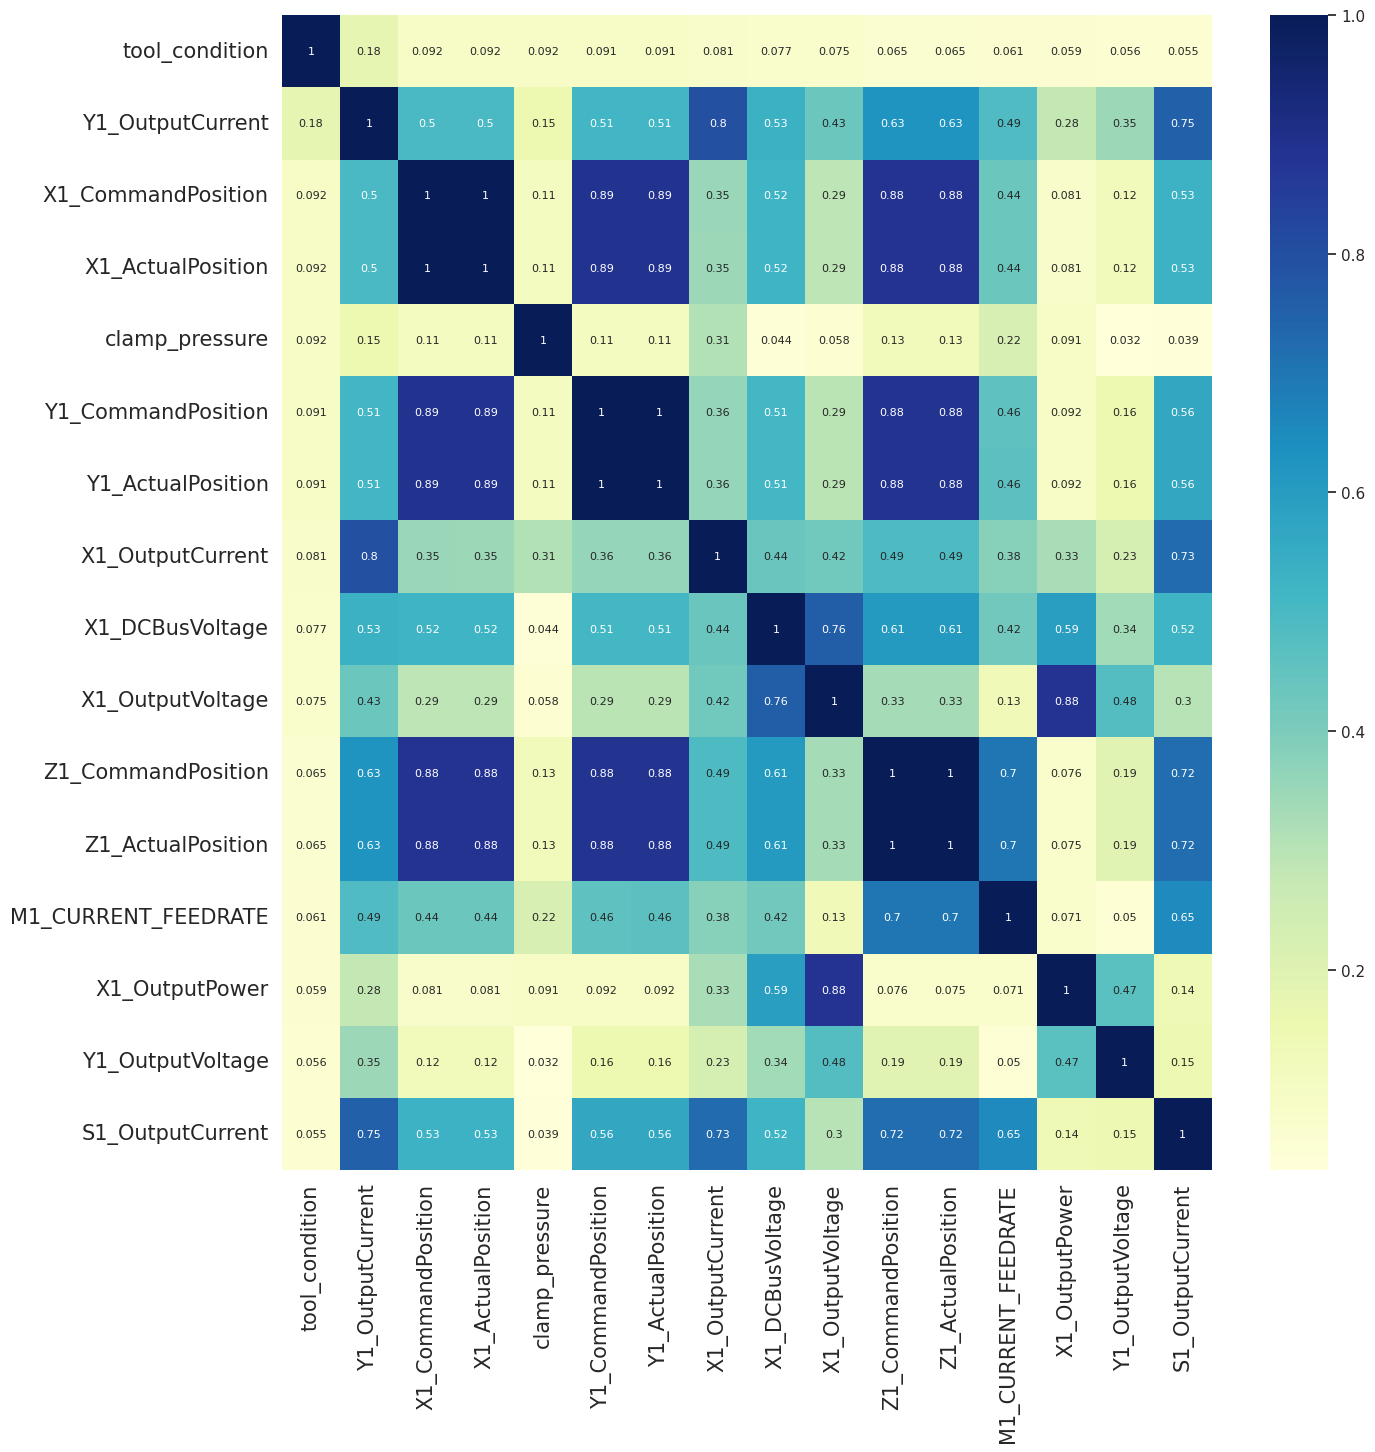

In [10]:
fig = plt.figure(figsize=(15,15))
sns.heatmap(abs(corr_data.corr()), annot=True, annot_kws={"size": 8}, cmap = "YlGnBu")
plt.tick_params(axis="x", rotation = 90, labelsize=15)
plt.tick_params(axis="y", labelsize=15)

In [11]:
cleaned_corr_data = corr_data.drop(["X1_CommandPosition", "Y1_CommandPosition", "Z1_CommandPosition"], axis=1)
cleaned_corr_data

,tool_condition,Y1_OutputCurrent,X1_ActualPosition,clamp_pressure,Y1_ActualPosition,X1_OutputCurrent,X1_DCBusVoltage,X1_OutputVoltage,Z1_ActualPosition,M1_CURRENT_FEEDRATE,X1_OutputPower,Y1_OutputVoltage,S1_OutputCurrent
0,0,328.0,198.0,4.0,158.0,329.0,0.0207,2.77,119.0,50.0,-0.000001,1.84,329.0
1,0,325.0,198.0,4.0,158.0,328.0,0.1860,23.30,119.0,50.0,0.004480,37.80,328.0
2,0,327.0,196.0,4.0,154.0,328.0,0.1400,30.60,115.0,50.0,0.005330,49.40,328.0
3,0,325.0,194.0,4.0,151.0,327.0,0.1300,30.30,112.0,50.0,0.004890,47.60,328.0
4,0,326.0,193.0,4.0,148.0,328.0,0.1140,30.50,109.0,50.0,0.004250,47.10,328.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25281,1,326.0,144.0,2.5,73.7,327.0,0.0732,9.56,28.7,3.0,0.000366,7.49,323.0
25282,1,326.0,144.0,2.5,73.8,327.0,0.0996,10.30,28.7,3.0,0.000506,8.17,320.0
25283,1,326.0,143.0,2.5,74.0,327.0,0.0539,7.79,28.7,3.0,0.000215,7.67,322.0
25284,1,326.0,143.0,2.5,74.2,327.0,0.0809,8.32,28.7,3.0,0.000330,10.60,322.0


In [12]:
cleaned_corr_data.columns

Index(['tool_condition', 'Y1_OutputCurrent', 'X1_ActualPosition',
       'clamp_pressure', 'Y1_ActualPosition', 'X1_OutputCurrent',
       'X1_DCBusVoltage', 'X1_OutputVoltage', 'Z1_ActualPosition',
       'M1_CURRENT_FEEDRATE', 'X1_OutputPower', 'Y1_OutputVoltage',
       'S1_OutputCurrent'],
      dtype='object')

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [41]:
y = np.array(cleaned_corr_data['tool_condition'])
x = cleaned_corr_data.drop('tool_condition', axis=1).values
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=123)
# Target distribution (count values)
print("Target distribution - 1 worn; 0 unworn:")
print(cleaned_corr_data['tool_condition'].value_counts())

Target distribution - 1 worn; 0 unworn:
tool_condition
1    13308
0    11978
Name: count, dtype: int64


In [43]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_score = model.predict(x_test)
print("Trained on {0} observations and scoring with {1} test samples.".format(len(x_train), len(x_test)))
print("Accuracy: {0:0.4f}".format(accuracy_score(y_test, y_score)))
print("F1 Score: {0:0.4f}".format(f1_score(y_test, y_score)))
# print("Area under ROC curve: {0:0.4f}".format(roc_auc_score(y_test, y_score)))

Trained on 20228 observations and scoring with 5058 test samples.
Accuracy: 0.9727
F1 Score: 0.9747


In [46]:
# Feature importances
features = [(cleaned_corr_data.columns[i], v) for i,v in enumerate(model.feature_importances_)]
features.sort(key=lambda x: x[1], reverse = True)
for item in features[:10]:
    print("{0}: {1:0.4f}".format(item[0], item[1]))



X1_OutputVoltage: 0.7312
Y1_OutputVoltage: 0.0619
tool_condition: 0.0527
Z1_ActualPosition: 0.0360
X1_ActualPosition: 0.0276
X1_OutputCurrent: 0.0205
X1_OutputPower: 0.0149
Y1_ActualPosition: 0.0147
M1_CURRENT_FEEDRATE: 0.0135
X1_DCBusVoltage: 0.0116


In [73]:
# print(cleaned_corr_data.head())
# print(x_test[0])
# print(y_test[0])

In [72]:
print("Predictions: ",model.predict(x_test)[:10])
print("Actual:      ",y_test[:10])

Predictions:  [1 0 0 0 0 1 1 0 0 0]
Actual:       [1 0 0 0 0 1 1 0 0 0]


In [65]:
num_samples = 10
min_values = np.array([2.0e+00, 1.0e+02, 2.0e+00, 8.0e+01, 3.00e+02, 1.0e-02, 1.0e+00, 2.0e+01, 2.0e+00, 1.0e-04, 1.0e+00, 2.50e+02])
max_values = np.array([4.00e+02, 2.00e+02, 4.00e+00, 1.20e+02, 3.50e+02, 0.20e+00, 10.0e+00, 3.00e+01, 4.00e+00, 1.0e-03, 5.0e+00, 3.50e+02])

# Generate random data samples
generated_samples = []
for _ in range(num_samples):
    sample = np.random.uniform(min_values, max_values)
    generated_samples.append(sample)

generated_samples = np.array(generated_samples)

print(generated_samples)

[[3.49684292e+02 1.92087240e+02 2.12215592e+00 9.10751059e+01
  3.40310064e+02 1.52169341e-01 2.66068917e+00 2.20934932e+01
  2.74094421e+00 5.36070687e-04 3.47301909e+00 2.86891364e+02]
 [1.86088817e+02 1.74747094e+02 2.07336641e+00 9.00974778e+01
  3.35667479e+02 1.80089299e-01 5.60509698e+00 2.53211349e+01
  2.21434402e+00 5.02671130e-04 3.13046907e+00 2.74247050e+02]
 [1.09158806e+02 1.37728416e+02 2.04014240e+00 9.28831666e+01
  3.10572400e+02 7.22244969e-02 2.07785919e+00 2.89052728e+01
  3.18718491e+00 7.11192087e-04 4.15668495e+00 2.99844220e+02]
 [3.65942747e+01 1.53710654e+02 3.17368224e+00 1.09817579e+02
  3.21582977e+02 3.42402575e-02 3.55398315e+00 2.36308230e+01
  3.29183448e+00 6.13700474e-04 2.42438690e+00 3.48651525e+02]
 [2.43098378e+02 1.23722679e+02 2.20356495e+00 8.61143656e+01
  3.12297886e+02 4.05294609e-02 2.67910322e+00 2.28509517e+01
  2.34674719e+00 9.07088882e-04 1.32093498e+00 3.02451139e+02]
 [1.65337937e+02 1.98237862e+02 2.22407780e+00 9.59142240e+01
  3

In [66]:
pred = model.predict(generated_samples.reshape(num_samples, -1))
print(pred)

[0 0 1 0 0 0 0 1 1 0]


Dataset: "https://www.kaggle.com/datasets/shasun/tool-wear-detection-in-cnc-mill"